In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import random 

random.seed(50)
x1 = random.sample(range(100), k=50)
x1 = np.array(x1)

x2 = random.sample(range(100), k=50)
x2 = np.array(x2)

In [3]:
np.mean(x1), np.std(x1)

(52.04, 28.120426739293983)

In [4]:
np.mean(x2), np.std(x2)

(49.52, 29.23233825748464)

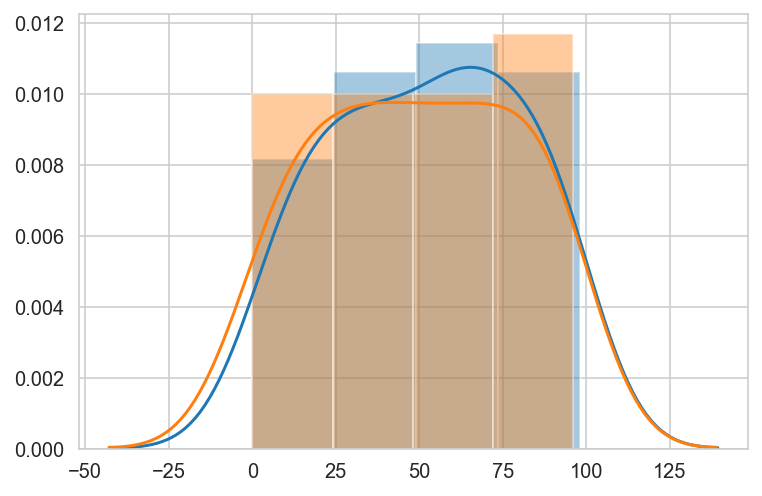

In [5]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [6]:
#Function for variance in each sample
def sample_variance(sample):
    var = np.var(sample)
    return var

In [7]:
#Finding each variance
sample_variance(x1), sample_variance(x2)

(790.7583999999999, 854.5296)

In [12]:
#Assuming Similar Variance:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
t_stat = two_t.statistic
p_val = two_t.pvalue
print('T-Stat: ',two_t.statistic, ' P-Val: ',two_t.pvalue)

T-Stat:  0.4348881917666152  P-Val:  0.6646011936800353


In [9]:
#Check T-Test results
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.4348881917666152, pvalue=0.6645997593834008)

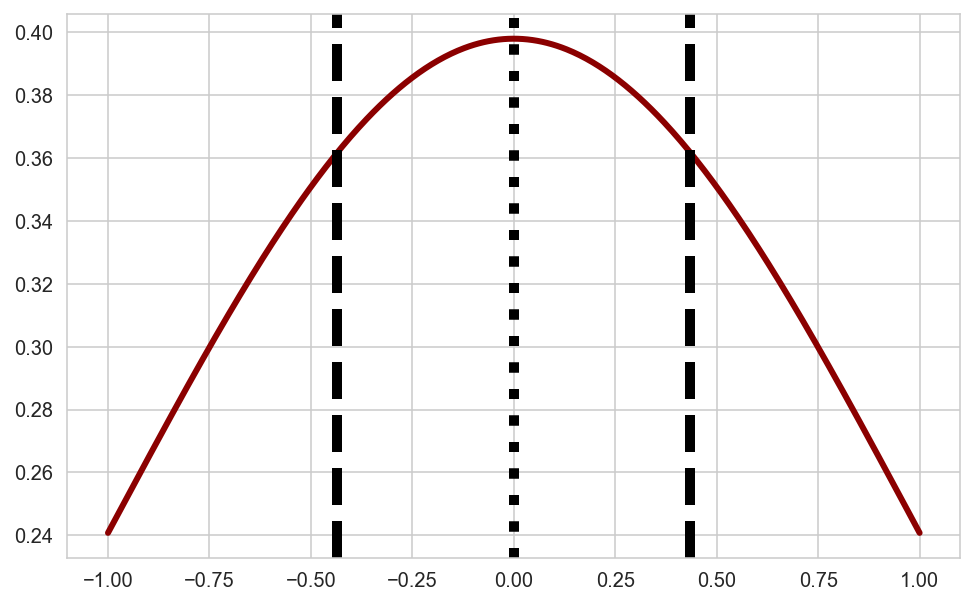

In [17]:
# Visualize p_value
def visualize_t(t_stat, sample1, sample2):
    
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-1, 1, 500)
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution    
    #Parameters:
    #x : array_like (quantiles), arg1, arg2, arg3,... : shape parameters for the distribution (lengths of axis), 
    #loc : mean, scale : std
    n_1 = len(sample1)
    n_2 = len(sample2)
    mean = 0
    std = 1
    ys= stats.t.pdf(xs, (n_1+n_2), mean, std)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)
    
    
    alpha = 0.05 / len(xs)
    ax.axvline(alpha, color='black', linestyle=':', lw=5)
    ax.axvline(-alpha, color='black', linestyle=':', lw=5)
    
    plt.show()

sample1 = x1
sample2 = x2

visualize_t(t_stat, x1, x2)

NameError: name 't' is not defined

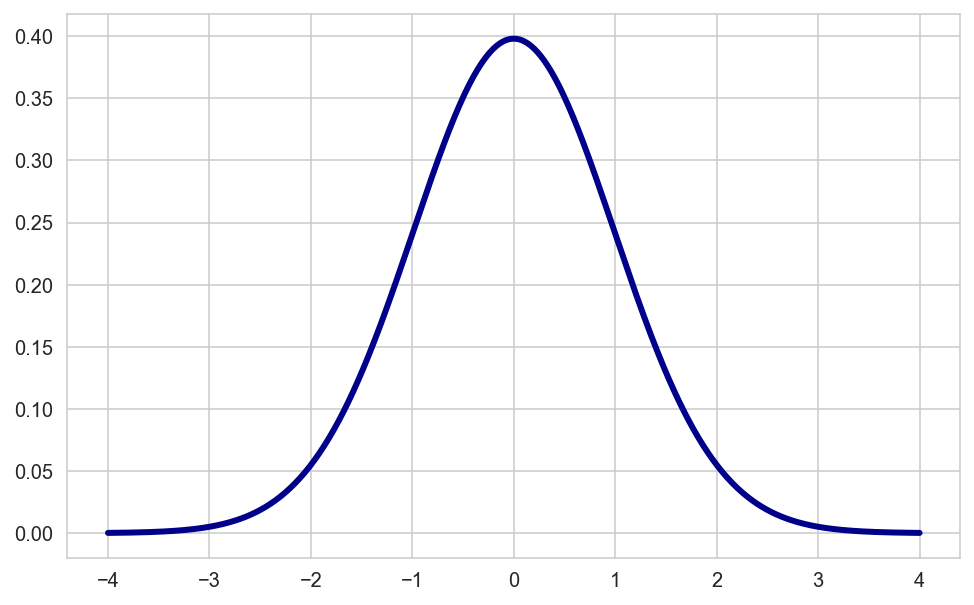

In [11]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
n_1 = len(sample1)
n_2 = len(sample2)
mean = 0
std = 1
ys= stats.t.pdf(xs, (n_1+n_2-2), mean, std)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)

ax.legend()
plt.show()

In [22]:
import scipy.stats
dfd1 = len(x1) - 1
scipy.stats.f.ppf(q=1-0.05, dfn=30, dfd=dfd1)
crit = _
scipy.stats.f.cdf(crit, dfn=3, dfd=39)

0.8154185567488359

In [23]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)